In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.metrics import confusion_matrix

In [3]:
emp_profile=pd.read_csv(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter3_Regression_Logistic\Datasets\employee_profile.csv")

#First few rows
emp_profile.head()

EmpId  Monthly_Income  Monthly_Expenses  Time_Spent_Reading_Books
0      1            6092           3836.80                        29
1      2            2109           1422.85                        14
2      3            7177           4717.05                        39
3      4            6665           4330.25                         1
4      5            8356           5552.40                        44

In [4]:
#Column names 
print(emp_profile.columns)

Index(['EmpId', 'Monthly_Income', 'Monthly_Expenses',
       'Time_Spent_Reading_Books'],
      dtype='object')


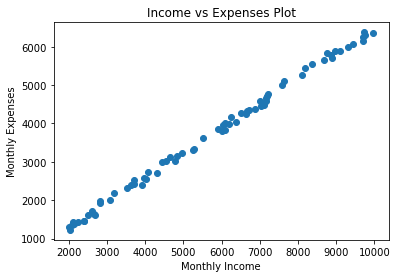

In [5]:
#Drawing the Scatter Plotq
plt.scatter(emp_profile["Monthly_Income"], emp_profile["Monthly_Expenses"])
plt.title('Income vs Expenses Plot')
plt.xlabel('Monthly Income')
plt.ylabel('Monthly Expenses')
plt.show()

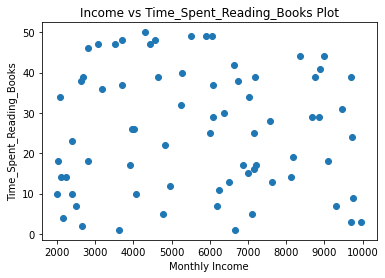

In [6]:
plt.scatter(emp_profile["Monthly_Income"], emp_profile["Time_Spent_Reading_Books"])
plt.title('Income vs Time_Spent_Reading_Books Plot')
plt.xlabel('Monthly Income')
plt.ylabel('Time_Spent_Reading_Books')
plt.show()

In [7]:
#Regression Model Building
air_pass=pd.read_csv(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter3_Regression_Logistic\Datasets\Air_Passengers.csv")

print(air_pass.columns)

Index(['Passengers_count', 'marketing_cost', 'percent_delayed_flights',
       'number_of_trips', 'customer_ratings', 'poor_weather_index',
       'percent_male_customers', 'Holiday_week', 'percent_female_customers'],
      dtype='object')


In [8]:
model1 = sm.ols(formula='Passengers_count ~ marketing_cost', data=air_pass)
fitted1 = model1.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     830.0
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.87e-83
Time:                        18:25:38   Log-Likelihood:                -2453.4
No. Observations:                 263   AIC:                             4911.
Df Residuals:                     261   BIC:                             4918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5186.6868    839.019      6.182      0.000    3534.579    6838.795
marketing_cost     6.3901      0.222     28.810      0.000       5.953       6.827
==============================================================================
Omnibus:                        8.874   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.679
Skew:                           0.342   Prob(JB):                      0.00791
Kurtosis:                       3.644   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#prediction from the model
new_data=pd.DataFrame({"marketing_cost":[4500]})
print(fitted1.predict(new_data))

0    33942.146091
dtype: float64


In [10]:
new_data1=pd.DataFrame({"marketing_cost":[4500,3600, 3000,5000]})
print(fitted1.predict(new_data1))

0    33942.146091
1    28191.054238
2    24356.993003
3    37137.197120
dtype: float64


In [11]:
#Predictions for the data
air_pass["passengers_count_pred"]=round(fitted1.predict(air_pass))
keep_cols=["marketing_cost", "Passengers_count", "passengers_count_pred"]
air_pass[keep_cols]

marketing_cost  Passengers_count  passengers_count_pred
0            3588.1             23291                28115.0
1            3186.3             25523                25547.0
2            3342.0             25620                26542.0
3            2512.5             19625                21242.0
4            3012.1             27231                24434.0
..              ...               ...                    ...
258          2929.8             24238                23908.0
259          4024.0             29600                30900.0
260          3003.8             28578                24381.0
261          3327.6             27426                26450.0
262          2052.1             17591                18300.0

[263 rows x 3 columns]

In [12]:
#R-Squared Value
model2 = sm.ols(formula='Passengers_count ~ customer_ratings', data=air_pass)
fitted2 = model2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     29.72
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.16e-07
Time:                        18:25:38   Log-Likelihood:                -2627.4
No. Observations:                 263   AIC:                             5259.
Df Residuals:                     261   BIC:                             5266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.261e+04   1192.915     18.955      0.000    2.03e+04     2.5e+04
customer_ratings   894.4643    164.083      5.451      0.000     571.369    1217.560
==============================================================================
Omnibus:                       28.234   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.541
Skew:                           0.767   Prob(JB):                     1.92e-08
Kurtosis:                       3.944   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Multiple regression
import statsmodels.formula.api as sm
model3 = sm.ols(formula='Passengers_count ~ marketing_cost+percent_delayed_flights+number_of_trips+customer_ratings+poor_weather_index+percent_female_customers+Holiday_week+percent_male_customers', data=air_pass)
fitted3 = model3.fit()
fitted3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     325.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          8.93e-129
Time:                        18:25:38   Log-Likelihood:                -2323.3
No. Observations:                 263   AIC:                             4665.
Df Residuals:                     254   BIC:                             4697.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4173.3041   3.71e+04      0.113      0.910   -6.88e+04    7.71e+04
marketing_cost               4.4279      0.168     26.287      0.000       4.096       4.760
percent_delayed_flights   2.187e+04   4827.398      4.530      0.000    1.24e+04    3.14e+04
number_of_trips              0.3004      0.270      1.114      0.266      -0.231       0.831
customer_ratings           546.3104     53.897     10.136      0.000     440.168     652.453
poor_weather_index        -919.5035   4520.130     -0.203      0.839   -9821.210    7982.203
percent_female_customers   -15.7188    371.808     -0.042      0.966    -747.937     716.499
Holiday_week              6804.5389    598.471     11.370      0.000    5625.942    7983.136
percent_male_customers      -7.3113    372.653     -0.020      0.984    -741.195     726.572
==============================================================================
Omnibus:                        0.087   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.957   Jarque-Bera (JB):                0.082
Skew:                           0.041   Prob(JB):                        0.960
Kurtosis:                       2.969   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Multicollinearity
income_expenses=pd.read_csv(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter3_Regression_Logistic\Datasets\customer_income_expenses.csv")

print(income_expenses.columns)

Index(['id', 'Monthly_Income_in_USD', 'Number_of_Credit_cards',
       'Number_of_personal_loans', 'Monthly_Income_in_Euro',
       'Monthly_Expenses'],
      dtype='object')


In [15]:
model4=sm.ols(formula='Monthly_Expenses ~ Monthly_Income_in_USD+Number_of_Credit_cards+Number_of_personal_loans+Monthly_Income_in_Euro', data=income_expenses)
fitted4 = model4.fit()
fitted4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Monthly_Expenses   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     483.1
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.31e-48
Time:                        18:25:38   Log-Likelihood:                -512.77
No. Observations:                  72   AIC:                             1036.
Df Residuals:                      67   BIC:                             1047.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -72.6691    143.534     -0.506      0.614    -359.164     213.826
Monthly_Income_in_USD        7.5244    121.538      0.062      0.951    -235.066     250.115
Number_of_Credit_cards      30.2664     53.290      0.568      0.572     -76.100     136.633
Number_of_personal_loans   149.2454    104.408      1.429      0.158     -59.155     357.645
Monthly_Income_in_Euro      -7.6337    135.041     -0.057      0.955    -277.178     261.910
==============================================================================
Omnibus:                       29.413   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.056
Skew:                           0.104   Prob(JB):                       0.0798
Kurtosis:                       1.719   Cond. No.                     4.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#Model after dropping Monthly_Income_in_USD
model5=sm.ols(formula='Monthly_Expenses ~Number_of_Credit_cards+Number_of_personal_loans+Monthly_Income_in_Euro', data=income_expenses)
fitted5 = model5.fit()
fitted5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Monthly_Expenses   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     653.7
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           4.71e-50
Time:                        18:25:38   Log-Likelihood:                -512.77
No. Observations:                  72   AIC:                             1034.
Df Residuals:                      68   BIC:                             1043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -67.9274    120.499     -0.564      0.575    -308.379     172.524
Number_of_Credit_cards      30.1840     52.882      0.571      0.570     -75.339     135.707
Number_of_personal_loans   149.1943    103.638      1.440      0.155     -57.611     356.000
Monthly_Income_in_Euro       0.7267      0.017     43.434      0.000       0.693       0.760
==============================================================================
Omnibus:                       29.870   Durbin-Watson:                   2.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.071
Skew:                           0.099   Prob(JB):                       0.0792
Kurtosis:                       1.715   Cond. No.                     1.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#VIF Function 
def vif_cal(x_vars):
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [18]:
#Calculating VIF values using that function
vif_cal(x_vars=income_expenses.drop(["Monthly_Expenses"], axis=1))

id  VIF =  1.07
Monthly_Income_in_USD  VIF =  65007299.17
Number_of_Credit_cards  VIF =  15.94
Number_of_personal_loans  VIF =  16.15
Monthly_Income_in_Euro  VIF =  65007347.03


In [19]:
#Calculating VIF values after dropping Monthly_Income_in_Euro
vif_cal(x_vars=income_expenses.drop(["Monthly_Expenses","Monthly_Income_in_Euro"], axis=1))

id  VIF =  1.06
Monthly_Income_in_USD  VIF =  1.01
Number_of_Credit_cards  VIF =  15.94
Number_of_personal_loans  VIF =  16.14


In [20]:
#Calculating VIF values after dropping Monthly_Income_in_Euro and Number_of_Credit_cards
vif_cal(x_vars=income_expenses.drop(["Monthly_Expenses","Monthly_Income_in_Euro","Number_of_personal_loans"], axis=1))

id  VIF =  1.01
Monthly_Income_in_USD  VIF =  1.0
Number_of_Credit_cards  VIF =  1.01


In [21]:
#The Final model after removing all the multicollinearity 
model6=sm.ols(formula='Monthly_Expenses ~ Monthly_Income_in_USD+Number_of_Credit_cards', data=income_expenses)
fitted6 = model6.fit()
fitted6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Monthly_Expenses   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     964.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           3.71e-51
Time:                        18:25:39   Log-Likelihood:                -513.85
No. Observations:                  72   AIC:                             1034.
Df Residuals:                      69   BIC:                             1041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -56.3653    121.148     -0.465      0.643    -298.049     185.319
Monthly_Income_in_USD      0.6522      0.015     43.134      0.000       0.622       0.682
Number_of_Credit_cards   103.7997     13.600      7.632      0.000      76.669     130.931
==============================================================================
Omnibus:                       34.625   Durbin-Watson:                   2.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.263
Skew:                           0.067   Prob(JB):                       0.0720
Kurtosis:                       1.682   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
#Calculating VIF values for airpassengers data 
vif_cal(x_vars=air_pass.drop(["Passengers_count","passengers_count_pred"], axis=1))

marketing_cost  VIF =  1.51
percent_delayed_flights  VIF =  13.4
number_of_trips  VIF =  1.03
customer_ratings  VIF =  1.06
poor_weather_index  VIF =  12.81
percent_male_customers  VIF =  990.52
Holiday_week  VIF =  1.21
percent_female_customers  VIF =  989.91


In [23]:
#Dropped percent_male_customers due to high VIF
vif_cal(x_vars=air_pass.drop(["Passengers_count","passengers_count_pred", "percent_male_customers"], axis=1))

marketing_cost  VIF =  1.51
percent_delayed_flights  VIF =  13.34
number_of_trips  VIF =  1.03
customer_ratings  VIF =  1.06
poor_weather_index  VIF =  12.78
Holiday_week  VIF =  1.2
percent_female_customers  VIF =  1.03


In [24]:
#Dropped percent_male_customers and percent_delayed_flights due to high VIF
vif_cal(x_vars=air_pass.drop(["Passengers_count","passengers_count_pred","percent_male_customers", "percent_delayed_flights"], axis=1))

marketing_cost  VIF =  1.45
number_of_trips  VIF =  1.02
customer_ratings  VIF =  1.06
poor_weather_index  VIF =  1.25
Holiday_week  VIF =  1.2
percent_female_customers  VIF =  1.01


In [25]:
#Model after exclusing the high VIF variables
model7 = sm.ols(formula='Passengers_count ~ marketing_cost+number_of_trips+customer_ratings+poor_weather_index+percent_female_customers+Holiday_week', data=air_pass)
fitted7 = model7.fit()
fitted7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     401.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          4.35e-127
Time:                        18:26:56   Log-Likelihood:                -2333.5
No. Observations:                 263   AIC:                             4681.
Df Residuals:                     256   BIC:                             4706.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 3659.6674    984.371      3.718      0.000    1721.172    5598.163
marketing_cost               4.5785      0.171     26.797      0.000       4.242       4.915
number_of_trips              0.4177      0.278      1.503      0.134      -0.130       0.965
customer_ratings           547.0027     55.782      9.806      0.000     437.152     656.853
poor_weather_index        1.855e+04   1461.863     12.691      0.000    1.57e+04    2.14e+04
percent_female_customers   -15.5571     12.302     -1.265      0.207     -39.783       8.668
Holiday_week              6802.3234    619.101     10.987      0.000    5583.144    8021.503
==============================================================================
Omnibus:                        1.354   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                1.134
Skew:                           0.154   Prob(JB):                        0.567
Kurtosis:                       3.094   Cond. No.                     5.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Individual impact of the variables 
##Drop two variables non-impacful number_of_trips and percent_female_customers
model8 = sm.ols(formula='Passengers_count ~ marketing_cost+customer_ratings+poor_weather_index+Holiday_week', data=air_pass)
fitted8 = model8.fit()
fitted8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     597.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          4.33e-129
Time:                        18:27:30   Log-Likelihood:                -2335.4
No. Observations:                 263   AIC:                             4681.
Df Residuals:                     258   BIC:                             4699.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3366.1891    664.355      5.067      0.000    2057.941    4674.438
marketing_cost         4.6010      0.170     27.002      0.000       4.265       4.936
customer_ratings     539.0514     55.771      9.665      0.000     429.228     648.875
poor_weather_index  1.852e+04   1465.404     12.638      0.000    1.56e+04    2.14e+04
Holiday_week        6790.5039    618.849     10.973      0.000    5571.866    8009.142
==============================================================================
Omnibus:                        1.156   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.561   Jarque-Bera (JB):                0.970
Skew:                           0.145   Prob(JB):                        0.616
Kurtosis:                       3.070   Cond. No.                     5.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#Drop an impactful variable
model9 = sm.ols(formula='Passengers_count ~  customer_ratings+poor_weather_index+Holiday_week', data=air_pass)
fitted9 = model9.fit()
fitted9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Passengers_count   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     145.2
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           3.44e-55
Time:                        18:27:54   Log-Likelihood:                -2511.8
No. Observations:                 263   AIC:                             5032.
Df Residuals:                     259   BIC:                             5046.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            1.45e+04   1016.979     14.257      0.000    1.25e+04    1.65e+04
customer_ratings     834.0677    106.768      7.812      0.000     623.823    1044.312
poor_weather_index  3.379e+04   2639.293     12.801      0.000    2.86e+04     3.9e+04
Holiday_week        1.223e+04   1142.371     10.705      0.000    9979.306    1.45e+04
==============================================================================
Omnibus:                        5.814   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                5.509
Skew:                           0.330   Prob(JB):                       0.0636
Kurtosis:                       3.257   Cond. No.                         95.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
##################################
####Logistic Regression
#################################

#product_sales Model
product_sales=pd.read_csv(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter3_Regression_Logistic\Datasets\Product_sales.csv")
print(product_sales.columns)

Index(['Income', 'Bought'], dtype='object')


In [29]:
model10 = sm.ols(formula='Bought ~  Income', data=product_sales)
fitted10 = model10.fit()
fitted10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Bought   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2489.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          8.50e-189
Time:                        18:28:52   Log-Likelihood:                 96.245
No. Observations:                 467   AIC:                            -188.5
Df Residuals:                     465   BIC:                            -180.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1805      0.015    -11.712      0.000      -0.211      -0.150
Income      2.095e-05    4.2e-07     49.886      0.000    2.01e-05    2.18e-05
==============================================================================
Omnibus:                       77.189   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.549
Skew:                           0.076   Prob(JB):                    3.65e-220
Kurtosis:                      10.205   Cond. No.                     6.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
#prediction from the model
new_data=pd.DataFrame({"Income":[4000]})
print(fitted10.predict(new_data))

0   -0.096753
dtype: float64


In [31]:
new_data1=pd.DataFrame({"Income":[85000]})
print(fitted10.predict(new_data1))

0    1.599893
dtype: float64


In [32]:
#product_sales data sample
print(product_sales.sample(10))

      Income  Bought
466  57387.4       1
267   2468.1       0
283  51759.2       1
196  10226.8       0
36    4643.9       0
265  63438.4       1
309  42236.6       1
86    1679.7       0
120  10598.5       0
419  12853.8       0


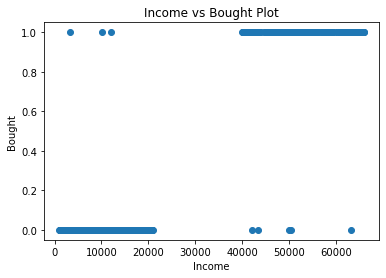

In [33]:
#Drawing the Scatter Plot
plt.scatter(product_sales["Income"], product_sales["Bought"])
plt.title('Income vs Bought Plot')
plt.xlabel('Income')
plt.ylabel('Bought')
plt.show()

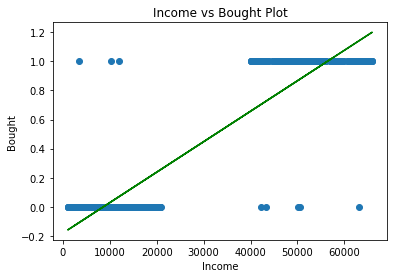

In [34]:
#Drawing the Regression line
pred_values= fitted10.predict(product_sales["Income"]) 
plt.scatter(product_sales["Income"], product_sales["Bought"])
plt.plot(product_sales["Income"], pred_values, color='green')
plt.title('Income vs Bought Plot')
plt.xlabel('Income')
plt.ylabel('Bought')
plt.show()

In [36]:
#3.9 Logistic Regression Model building
import statsmodels.api as sm
logit_model=sm.Logit(product_sales["Bought"],product_sales["Income"])
#Model with intercept
logit_model1=sm.Logit(product_sales["Bought"],sm.add_constant(product_sales["Income"]))
logit_fit1=logit_model1.fit()
logit_fit1.summary()

Optimization terminated successfully.
         Current function value: 0.101165
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Bought   No. Observations:                  467
Model:                          Logit   Df Residuals:                      465
Method:                           MLE   Df Model:                            1
Date:                Tue, 31 Jan 2023   Pseudo R-squ.:                  0.8525
Time:                        18:32:20   Log-Likelihood:                -47.244
converged:                       True   LL-Null:                       -320.21
Covariance Type:            nonrobust   LLR p-value:                9.637e-121
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0288      0.739     -9.505      0.000      -8.478      -5.579
Income         0.0002    2.1e-05     10.397      0.000       0.000       0.000
==============================================================================
"""

In [37]:
#prediction from the model
new_data=pd.DataFrame({"Constant":[1,1],"Income":[4000, 85000]})
print(logit_fit1.predict(new_data))

0    0.002118
1    0.999990
dtype: float64


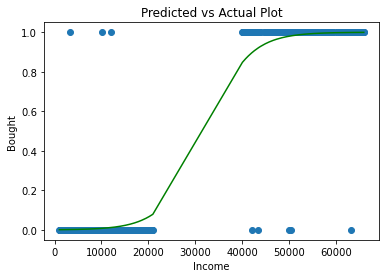

In [38]:
#Drawing the Logistic line

new_data=product_sales.drop(["Bought"], axis=1)
new_data["Constant"]=1
new_data=new_data[["Constant","Income"]]
#Pass the variables to get the predicted values. Add actual values in a new column 
new_data["pred_values"]= logit_fit1.predict(new_data)
new_data["Actual"]=product_sales["Bought"]
#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["Income"], new_data["Actual"])
plt.plot(new_data["Income"], new_data["pred_values"], color='green')
#Add lables and title 
plt.title('Predicted vs Actual Plot')
plt.xlabel('Income')
plt.ylabel('Bought')
plt.show()

In [39]:
#Accuracy of the model 
print(product_sales.head(10))

    Income  Bought
0   2380.0       0
1   7351.1       0
2  48224.4       1
3   4833.0       0
4  18426.1       0
5  52709.0       1
6  54926.7       1
7  52109.3       1
8   8658.6       0
9  12227.9       0


In [41]:
#Add a new column for intercept. This will be used in prediction
product_sales["Constant"]=1
#Get the predicted values into a new column
product_sales["pred_Bought"]=logit_fit1.predict(product_sales[["Constant","Income"]])
product_sales["pred_Bought"]=round(product_sales["pred_Bought"])

#Data after updating with predicted values
print(product_sales[["Bought","pred_Bought"]])

     Bought  pred_Bought
0         0          0.0
1         0          0.0
2         1          1.0
3         0          0.0
4         0          0.0
..      ...          ...
462       0          0.0
463       0          0.0
464       1          1.0
465       1          1.0
466       1          1.0

[467 rows x 2 columns]


In [42]:
cm1 = confusion_matrix(product_sales["Bought"],product_sales["pred_Bought"])
print(cm1)

[[257   5]
 [  3 202]]


In [43]:
accuracy1=(cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1])
print(accuracy1)

0.9828693790149893


In [44]:
#3.10 Multiple Logistic Regression Line

telco_cust=pd.read_csv(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter3_Regression_Logistic\Datasets\telco_data.csv")
print(telco_cust.shape)
print(telco_cust.columns)

(100000, 11)
Index(['Id', 'Active_cust', 'estimated_income', 'months_on_network',
       'complaints_count', 'plan_changes_count', 'relocated_new_place',
       'monthly_bill_avg', 'CSAT_Survey_Score', 'high_talktime_flag',
       'internet_time'],
      dtype='object')


In [45]:
import statsmodels.api as sm
logit_model2=sm.Logit(telco_cust['Active_cust'],telco_cust[["estimated_income"]+['months_on_network']+['complaints_count']+['plan_changes_count']+['relocated_new_place']+['monthly_bill_avg']+["CSAT_Survey_Score"]+['high_talktime_flag']+['internet_time']])
logit_fit2=logit_model2.fit()
logit_fit2.summary()

Optimization terminated successfully.
         Current function value: 0.327208
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99991
Method:                           MLE   Df Model:                            8
Date:                Tue, 31 Jan 2023   Pseudo R-squ.:                  0.5193
Time:                        18:36:26   Log-Likelihood:                -32721.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
estimated_income     5.476e-05   3.15e-05      1.740      0.082   -6.93e-06       0.000
months_on_network      -2.1605      2.473     -0.874      0.382      -7.008       2.687
complaints_count       31.7026     37.097      0.855      0.393     -41.006     104.411
plan_changes_count     -0.5828      0.011    -52.166      0.000      -0.605      -0.561
relocated_new_place    -2.4047      0.047    -51.554      0.000      -2.496      -2.313
monthly_bill_avg       -0.0035      0.000    -17.173      0.000      -0.004      -0.003
CSAT_Survey_Score       3.3119      3.710      0.893      0.372      -3.959      10.583
high_talktime_flag     -0.0354      0.020     -1.763      0.078      -0.075       0.004
internet_time           0.0079   4.68e-05    168.858      0.000       0.008       0.008
=======================================================================================
"""

In [46]:
#Confuson Matrix and Accuracy
telco_cust["pred_Active_cust"]=logit_fit2.predict(telco_cust.drop(["Id","Active_cust"],axis=1))
telco_cust["pred_Active_cust"]=round(telco_cust["pred_Active_cust"])

In [47]:
cm2 = confusion_matrix(telco_cust["Active_cust"],telco_cust["pred_Active_cust"])
print(cm2)

[[35985  6156]
 [ 7443 50416]]


In [48]:
accuracy2=(cm2[0,0]+cm2[1,1])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1])
print(accuracy2)

0.86401


In [51]:
import statsmodels.formula.api as sm1
def vif_cal(x_vars):
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm1.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [52]:
#Calculating VIF values using that function
vif_cal(x_vars=telco_cust.drop(["Id","Active_cust","pred_Active_cust"], axis=1))

estimated_income  VIF =  1.02
months_on_network  VIF =  20991947.38
complaints_count  VIF =  1105768.47
plan_changes_count  VIF =  1.56
relocated_new_place  VIF =  1.63
monthly_bill_avg  VIF =  1.0
CSAT_Survey_Score  VIF =  22885771.92
high_talktime_flag  VIF =  1.0
internet_time  VIF =  1.07


In [53]:
#Drop CSAT_Survey_Score
vif_cal(x_vars=telco_cust.drop(["Id","Active_cust","pred_Active_cust","CSAT_Survey_Score"], axis=1))

estimated_income  VIF =  1.02
months_on_network  VIF =  1.03
complaints_count  VIF =  1.02
plan_changes_count  VIF =  1.56
relocated_new_place  VIF =  1.63
monthly_bill_avg  VIF =  1.0
high_talktime_flag  VIF =  1.0
internet_time  VIF =  1.07


In [54]:
import statsmodels.api as sm
logit_model3=sm.Logit(telco_cust['Active_cust'],telco_cust[["estimated_income"]+['months_on_network']+['complaints_count']+['plan_changes_count']+['relocated_new_place']+['monthly_bill_avg']+['high_talktime_flag']+['internet_time']])
logit_fit3=logit_model3.fit()
logit_fit3.summary()

Optimization terminated successfully.
         Current function value: 0.327212
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99992
Method:                           MLE   Df Model:                            7
Date:                Tue, 31 Jan 2023   Pseudo R-squ.:                  0.5193
Time:                        18:38:15   Log-Likelihood:                -32721.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
estimated_income     5.457e-05   3.15e-05      1.735      0.083   -7.08e-06       0.000
months_on_network       0.0474      0.001     60.421      0.000       0.046       0.049
complaints_count       -1.4164      0.024    -59.194      0.000      -1.463      -1.370
plan_changes_count     -0.5827      0.011    -52.166      0.000      -0.605      -0.561
relocated_new_place    -2.4051      0.047    -51.561      0.000      -2.496      -2.314
monthly_bill_avg       -0.0035      0.000    -17.172      0.000      -0.004      -0.003
high_talktime_flag     -0.0354      0.020     -1.760      0.078      -0.075       0.004
internet_time           0.0079   4.68e-05    168.861      0.000       0.008       0.008
=======================================================================================
"""

In [55]:
#Confuson Matrix and Accuracy
telco_cust["pred_Active_cust"]=logit_fit3.predict(telco_cust.drop(["Id","Active_cust","pred_Active_cust","CSAT_Survey_Score"],axis=1))
telco_cust["pred_Active_cust"]=round(telco_cust["pred_Active_cust"])

In [56]:
cm3 = confusion_matrix(telco_cust["Active_cust"],telco_cust["pred_Active_cust"])
print(cm3)

[[35983  6158]
 [ 7442 50417]]


In [57]:
accuracy3=(cm3[0,0]+cm3[1,1])/(cm3[0,0]+cm3[0,1]+cm3[1,0]+cm3[1,1])
print(accuracy3)

0.864


In [58]:
#3.12 Individual impact of the variables 

#Drop estimated_income and high_talktime_flag 
import statsmodels.api as sm
logit_model4=sm.Logit(telco_cust['Active_cust'],telco_cust[['months_on_network']+['complaints_count']+['plan_changes_count']+['relocated_new_place']+['monthly_bill_avg']+['internet_time']])
logit_fit4=logit_model4.fit()
logit_fit4.summary()

Optimization terminated successfully.
         Current function value: 0.327522
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99994
Method:                           MLE   Df Model:                            5
Date:                Tue, 31 Jan 2023   Pseudo R-squ.:                  0.5189
Time:                        18:39:59   Log-Likelihood:                -32752.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
months_on_network       0.0463      0.001     69.979      0.000       0.045       0.048
complaints_count       -1.3804      0.013   -105.503      0.000      -1.406      -1.355
plan_changes_count     -0.5807      0.011    -52.132      0.000      -0.603      -0.559
relocated_new_place    -2.3988      0.046    -51.593      0.000      -2.490      -2.308
monthly_bill_avg       -0.0034      0.000    -17.166      0.000      -0.004      -0.003
internet_time           0.0079   4.67e-05    169.255      0.000       0.008       0.008
=======================================================================================
"""

In [59]:
#Confuson Matrix and Accuracy
telco_cust["pred_Active_cust"]=logit_fit4.predict(telco_cust.drop(["Id","Active_cust","pred_Active_cust","CSAT_Survey_Score","estimated_income","high_talktime_flag"],axis=1))
telco_cust["pred_Active_cust"]=round(telco_cust["pred_Active_cust"])

In [60]:
cm4= confusion_matrix(telco_cust["Active_cust"],telco_cust["pred_Active_cust"])
print(cm4)

[[36010  6131]
 [ 7474 50385]]


In [61]:
accuracy4=(cm4[0,0]+cm4[1,1])/(cm4[0,0]+cm4[0,1]+cm4[1,0]+cm4[1,1])
print(accuracy4)

0.86395
